In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import datetime as dt

In [5]:
from matplotlib import pyplot as plt

In [6]:
from scipy import stats as stats

In [7]:
customers=pd.read_csv('CUSTOMERS.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [8]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers.dropna(axis=0,inplace=True)

In [10]:
customers.drop_duplicates(inplace=True)

In [11]:
geolocation=pd.read_csv('GEO_LOCATION.csv')
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [12]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19015 entries, 0 to 19014
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geolocation_zip_code_prefix  19015 non-null  int64  
 1   geolocation_lat              19015 non-null  float64
 2   geolocation_lng              19015 non-null  float64
 3   geolocation_city             19015 non-null  object 
 4   geolocation_state            19015 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 742.9+ KB


In [13]:
geolocation.dropna(axis=0,inplace=True)

In [14]:
geolocation.drop_duplicates(inplace=True)

In [15]:
orderitems=pd.read_csv('ORDER_ITEMS.csv')
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,5/2/2018 4:11,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,7/20/2018 4:31,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,10/30/2017 17:14,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,8/21/2017 0:04,55.99,8.72


In [16]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [17]:
orderitems.dropna(axis=0,inplace=True)

In [18]:
orderitems.drop_duplicates(inplace=True)

In [19]:
orderitems['shipping_limit_date']=orderitems['shipping_limit_date'].apply(pd.to_datetime)

In [20]:
orderpayments=pd.read_csv('ORDER_PAYMENTS.csv')
orderpayments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [21]:
orderpayments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
orderpayments.dropna(axis=0,inplace=True)

In [23]:
orderpayments.drop_duplicates(inplace=True)

In [24]:
orderreviewratings=pd.read_csv('ORDER_REVIEW_RATINGS.csv')
orderreviewratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2/17/2018 0:00,2/18/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,4/21/2017 0:00,4/21/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,3/1/2018 0:00,3/2/2018 10:26
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,12/9/2017 0:00,12/11/2017 20:06
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,3/22/2018 0:00,3/23/2018 9:10
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,7/1/2018 0:00,7/2/2018 12:59
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,12/15/2017 0:00,12/16/2017 1:29


In [25]:
orderreviewratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_creation_date     100000 non-null  object
 4   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
orderreviewratings['review_creation_date']=orderreviewratings['review_creation_date'].apply(pd.to_datetime)
orderreviewratings['review_answer_timestamp']=orderreviewratings['review_answer_timestamp'].apply(pd.to_datetime)

In [27]:
orderreviewratings.dropna(axis=0,inplace=True)

In [28]:
orderreviewratings.drop_duplicates(inplace=True)

In [29]:
orders=pd.read_csv('ORDERS.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,3/9/2017 9:54,3/9/2017 9:54,3/10/2017 11:18,3/17/2017 15:08,3/28/2017 0:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2/6/2018 12:58,2/6/2018 13:10,2/7/2018 23:22,2/28/2018 17:37,3/2/2018 0:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,8/27/2017 14:46,8/27/2017 15:04,8/28/2017 20:52,9/21/2017 11:24,9/27/2017 0:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,1/8/2018 21:28,1/8/2018 21:36,1/12/2018 15:35,1/25/2018 23:32,2/15/2018 0:00


In [30]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [31]:
orders.dropna(axis=0,inplace=True)

In [32]:
orders.drop_duplicates(keep='first',inplace=True)

In [33]:
orders['order_purchase_timestamp']=orders['order_purchase_timestamp'].apply(pd.to_datetime)

In [34]:
orders['order_approved_at']=orders['order_approved_at'].apply(pd.to_datetime)

In [35]:
orders['order_delivered_carrier_date']=orders['order_delivered_carrier_date'].apply(pd.to_datetime)

In [36]:
orders['order_delivered_customer_date']=orders['order_delivered_customer_date'].apply(pd.to_datetime)

In [37]:
orders['order_estimated_delivery_date']=orders['order_estimated_delivery_date'].apply(pd.to_datetime)

In [38]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


In [39]:
products=pd.read_csv('PRODUCTS.csv')
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [40]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [41]:
products.dropna(axis=0,inplace=True)

In [42]:
products.drop_duplicates(keep='first',inplace=True)

In [43]:
sellers=pd.read_csv('SELLERS.csv')
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [44]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3038 non-null   object
 3   seller_state            3038 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [45]:
sellers.dropna(axis=0,inplace=True)

In [46]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [47]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh
2,1041,-23.544392,-46.639499,Akkarampalle,Andhra Pradesh
3,1035,-23.541578,-46.641607,Akkarampalle,Andhra Pradesh
4,1012,-23.547762,-46.635361,Akkarampalle,Andhra Pradesh
...,...,...,...,...,...
19010,99955,-28.107588,-52.144019,Ghaziabad,Uttar Pradesh
19011,99970,-28.345143,-51.876926,Vadugapatti,Tamil Nadu
19012,99910,-27.863500,-52.084760,Akkarampalle,Andhra Pradesh
19013,99920,-27.858716,-52.300403,Kolkata,West Bengal


In [48]:
loc_cordinates=geolocation[['geolocation_zip_code_prefix','geolocation_lat','geolocation_lng']].groupby('geolocation_zip_code_prefix').sum().reset_index()

In [49]:
cols=['customer_id','customer_unique_id',
      'customer_zip_code_prefix','customer_city','customer_state','geolocation_lat','geolocation_lng']

In [50]:
customer_data=pd.merge(left=customers,right=loc_cordinates,
                       left_on='customer_zip_code_prefix',
                       right_on='geolocation_zip_code_prefix',how='left')[cols]

In [51]:
customer_data.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,-20.509898,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,-23.726853,-46.545746
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,-23.527788,-46.660310
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,-23.496930,-46.185352
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,-22.987222,-47.151073


In [52]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15


In [53]:
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


In [54]:
cols=['order_id','customer_id','order_purchase_timestamp','order_item_id','product_id','price','freight_value']

In [55]:
complete_order=pd.merge(left=orders,right=orderitems,on='order_id',how='inner')[cols]

In [56]:
complete_order

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [57]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [58]:
cols = ['order_id','order_purchase_timestamp',
    'order_item_id','product_id','price','freight_value',
    'customer_unique_id']

In [59]:
cust_orders = pd.merge(left= complete_order,right= customers,on= 'customer_id',how= 'inner')[cols]

In [60]:
cust_orders.head(5)

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,72632f0f9dd73dfee390c9b22eb56dd6


In [61]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15


In [62]:
orderpayments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [63]:
cols=['order_id','customer_id','order_purchase_timestamp','payment_installments','payment_value']

In [64]:
cust_order_payment=pd.merge(left=orders,right=orderpayments,on='order_id',how='left')[cols]

In [65]:
cust_order_payment.head(5)

,order_id,customer_id,order_purchase_timestamp,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,3.0,179.12


In [66]:
orderreviewratings

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:00
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:00
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:00
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:00
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:00
...,...,...,...,...,...
99995,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:00
99996,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:00
99997,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:00
99998,be360f18f5df1e0541061c87021e6d93,f8bd3f2000c28c5342fedeb5e50f2e75,1,2017-12-15,2017-12-16 01:29:00


In [67]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15


In [68]:
cols=['order_id','customer_id','order_status','review_id','review_score',]

In [69]:
cust_order_review=pd.merge(left=orders,right=orderreviewratings,how='left',on='order_id')[cols]

In [70]:
cust_order_review.head(5)

,order_id,customer_id,order_status,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5


In [71]:
complete_order

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [72]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [73]:
order_products=pd.merge(left=complete_order[['order_id','order_purchase_timestamp','order_item_id','product_id','price','freight_value']],
                        right=products[['product_id','product_category_name']], on='product_id',how='inner')
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [74]:
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


In [75]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [76]:
order_seller=pd.merge(left=orderitems[['order_id','order_item_id','product_id','seller_id','price','freight_value']],
                     right=sellers[['seller_id','seller_zip_code_prefix','seller_city','seller_state']], 
                      on='seller_id', how='inner')
order_seller

,order_id,order_item_id,product_id,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,27277,Serilingampalle,Andhra Pradesh
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,55.90,9.94,27277,Serilingampalle,Andhra Pradesh
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,132.90,20.17,27277,Serilingampalle,Andhra Pradesh
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,58.90,15.16,27277,Serilingampalle,Andhra Pradesh
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,139.90,16.74,27277,Serilingampalle,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
111078,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,199.99,18.14,14402,Adilabad,Andhra Pradesh
111079,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,82620,Anakapalle,Andhra Pradesh
111080,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,193.21,86026,Kapas Hera,Delhi
111081,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,27.90,14.44,3124,Akkarampalle,Andhra Pradesh


In [77]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana
3091,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat
3092,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh


In [78]:
loc_cordinates

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.549292,-46.633559
1,1002,-23.548318,-46.635421
2,1003,-23.549032,-46.635313
3,1004,-23.550116,-46.635122
4,1005,-23.549819,-46.635606
...,...,...,...
19010,99960,-27.953797,-52.029641
19011,99965,-28.173892,-52.038447
19012,99970,-28.345143,-51.876926
19013,99980,-28.389218,-51.846012


In [79]:
sellers_geolocation=pd.merge(left=sellers , right=loc_cordinates,
                             left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix',how='left')
sellers_geolocation

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh,13023.0,-22.898536,-47.063125
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh,13023.0,-22.898536,-47.063125
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh,20031.0,-22.910641,-43.176510
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh,4195.0,-23.657250,-46.610759
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh,12914.0,-22.971648,-46.533618
...,...,...,...,...,...,...,...
3033,98dddbc4601dd4443ca174359b237166,87111,Kalan Wali,Haryana,87111.0,-23.456431,-51.866369
3034,f8201cab383e484733266d1906e2fdfa,88137,Bopal,Gujarat,88137.0,-27.623801,-48.674286
3035,74871d19219c7d518d0090283e03c137,4650,Akkarampalle,Andhra Pradesh,4650.0,-23.659845,-46.677882
3036,e603cf3fec55f8697c9059638d6c8eb5,96080,Ekambara kuppam,Andhra Pradesh,96080.0,-31.744231,-52.328761


In [80]:
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


# 1. Perform Detailed exploratory analysis

## a. Define & calculate high level metrics like (Total Revenue, Total quantity, Tota products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…) 

In [81]:
total_revenue=orderitems['price'].sum()

In [82]:
total_revenue

13591643.700000003

In [83]:
total_quantity=orderitems['order_id'].count()

In [84]:
total_quantity

112650

In [85]:
total_products=products['product_id'].count()

In [86]:
total_products

32327

In [87]:
total_categories=products['product_category_name'].nunique()

In [88]:
total_categories

71

In [89]:
total_sellers=sellers['seller_id'].count()

In [90]:
total_sellers

3038

In [91]:
total_locations=geolocation['geolocation_zip_code_prefix'].count()

In [92]:
total_locations

19015

In [93]:
total_payment_methods=orderpayments['payment_type'].nunique()

In [94]:
total_payment_methods

5

## b. Understanding how many new customers acquired every month 

In [95]:
year_month=orders['order_purchase_timestamp'].dt.to_period('M')
year_month

0        2017-10
1        2018-07
2        2018-08
3        2017-11
4        2018-02
          ...   
99436    2017-03
99437    2018-02
99438    2017-08
99439    2018-01
99440    2018-03
Name: order_purchase_timestamp, Length: 96461, dtype: period[M]

In [96]:
orders["year_month"]=year_month
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01


In [97]:
orders['month'] = pd.to_datetime(orders['order_purchase_timestamp']).dt.month
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1


In [98]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [99]:
cust_order2=pd.merge(left=customers, right=orders, how='left',on='customer_id')
cust_order2

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05-16 15:22:00,2017-05-23 10:47:00,2017-05-25 10:35:00,2017-06-05,2017-05,5.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01-12 20:58:00,2018-01-15 17:14:00,2018-01-29 12:41:00,2018-02-06,2018-01,1.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05-20 16:19:00,2018-06-11 14:31:00,2018-06-14 17:58:00,2018-06-13,2018-05,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03-13 17:29:00,2018-03-27 23:22:00,2018-03-28 16:04:00,2018-04-10,2018-03,3.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07-29 10:10:00,2018-07-30 15:16:00,2018-08-09 20:55:00,2018-08-15,2018-07,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,2018-04-07 16:08:00,2018-04-11 02:08:00,2018-04-13 20:06:00,2018-04-25,2018-04,4.0
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,2018-04-04 08:35:00,2018-04-05 18:42:00,2018-04-11 18:54:00,2018-04-20,2018-04,4.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,2018-04-08 20:30:00,2018-04-09 17:52:00,2018-05-09 19:03:00,2018-05-02,2018-04,4.0
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,2017-11-03 21:31:00,2017-11-06 18:24:00,2017-11-16 19:58:00,2017-12-05,2017-11,11.0


In [100]:
cust_month= cust_order2.loc[:,['customer_unique_id','year_month']]

In [101]:
cust_month.drop_duplicates(subset='customer_unique_id',inplace=True)


In [102]:
new_cust_monthly=cust_month.groupby('year_month')[['customer_unique_id']].count()
new_cust_monthly.head(5)

,customer_unique_id
year_month,
2016-09,1
2016-10,261
2017-01,700
2017-02,1591
2017-03,2464


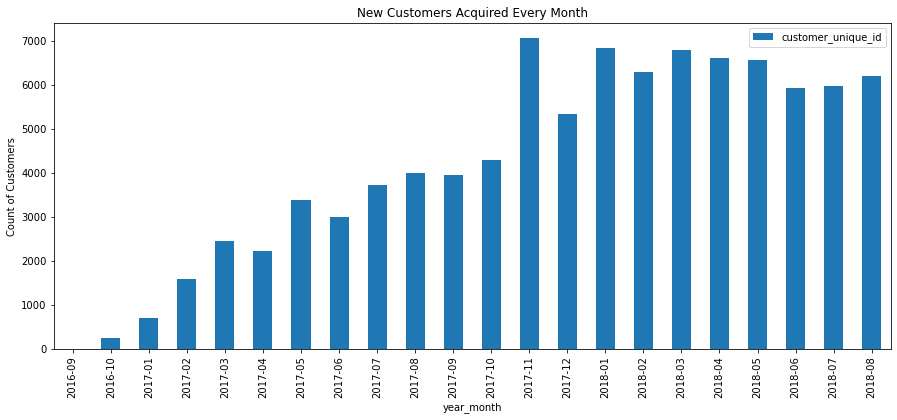

In [103]:
new_cust_monthly.plot(kind='bar',figsize=(15,6))
plt.ylabel("Count of Customers")
plt.title("New Customers Acquired Every Month")
plt.show()

## c. Understand the retention of customers on month on month basis Understand the retention of customers on month on month basis

In [104]:
cust_monthly_count=cust_order2.groupby('year_month')[['customer_unique_id']].count().reset_index()

In [105]:
cust_monthly_count

,year_month,customer_unique_id
0,2016-09,1
1,2016-10,270
2,2016-12,1
3,2017-01,748
4,2017-02,1641
5,2017-03,2546
6,2017-04,2303
7,2017-05,3545
8,2017-06,3135
9,2017-07,3872


In [106]:
cust_monthly_count.customer_unique_id.sum()

96461

In [107]:
retented_customer_monthly=pd.merge(left=new_cust_monthly, right=cust_monthly_count, how='left',
                                    on='year_month')
retented_customer_monthly

,year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,1,1
1,2016-10,261,270
2,2017-01,700,748
3,2017-02,1591,1641
4,2017-03,2464,2546
5,2017-04,2220,2303
6,2017-05,3385,3545
7,2017-06,2998,3135
8,2017-07,3718,3872
9,2017-08,4011,4193


In [108]:
retented_customer_monthly['retented_customer']= retented_customer_monthly.customer_unique_id_y - retented_customer_monthly.customer_unique_id_x

In [109]:
retented_customer_monthly

,year_month,customer_unique_id_x,customer_unique_id_y,retented_customer
0,2016-09,1,1,0
1,2016-10,261,270,9
2,2017-01,700,748,48
3,2017-02,1591,1641,50
4,2017-03,2464,2546,82
5,2017-04,2220,2303,83
6,2017-05,3385,3545,160
7,2017-06,2998,3135,137
8,2017-07,3718,3872,154
9,2017-08,4011,4193,182


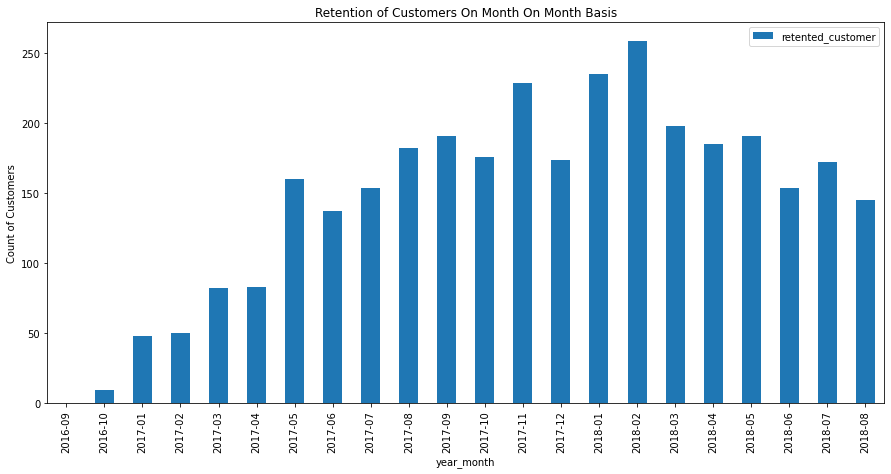

In [110]:
retented_customer_monthly.plot( kind='bar', x='year_month', y='retented_customer' , figsize=(15,7))
plt.ylabel("Count of Customers")
plt.title('Retention of Customers On Month On Month Basis')
plt.show()


## d. How the revenues from existing/new customers on month on month basis 

In [111]:
complete_order

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [112]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1


In [113]:
complete_order2=pd.merge(left=complete_order[['order_id','customer_id','order_purchase_timestamp','order_item_id','product_id','price','freight_value']],
                         right=orders[['order_id','order_status','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date','year_month','month']], 
                         how='left', on ='order_id')
complete_order2

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,delivered,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,delivered,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,delivered,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,delivered,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,delivered,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,delivered,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02,delivered,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1


In [114]:
complete_order2['net price']=complete_order2.price + complete_order2.freight_value

In [115]:
complete_order2

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month,net price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,delivered,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,delivered,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,delivered,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,delivered,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,delivered,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,delivered,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2,195.00
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02,delivered,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8,271.01
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58


In [116]:
revenue_month=complete_order2.groupby('year_month')[['net price']].sum()

In [117]:
revenue_month

,net price
year_month,
2016-09,143.46
2016-10,47195.15
2016-12,19.62
2017-01,127367.44
2017-02,269399.65
2017-03,414330.95
2017-04,390812.40
2017-05,566657.40
2017-06,490050.37


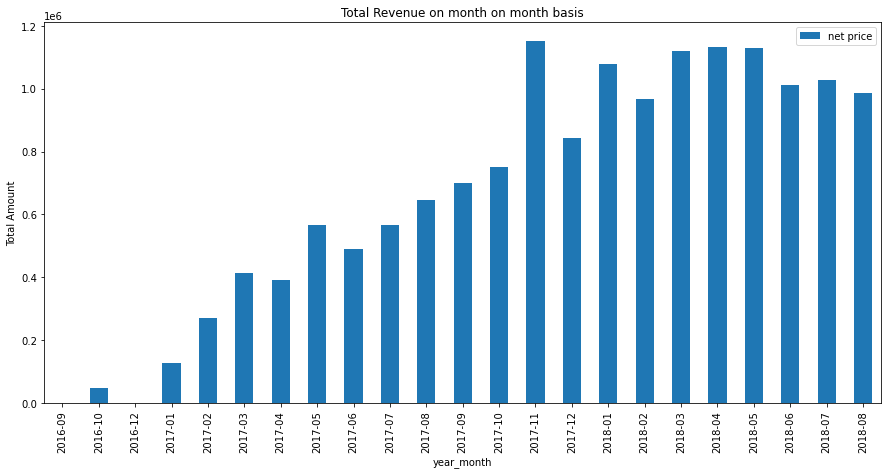

In [118]:
revenue_month.plot( kind = 'bar', figsize =(15,7))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()


## e. Understand the trends/seasonality of sales, quantity by category, location, month,week, day, time, channel, payment method etc…
 

In [119]:
complete_order2

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month,net price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,delivered,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,delivered,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,delivered,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,delivered,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,delivered,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,delivered,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2,195.00
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02,delivered,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8,271.01
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58


In [120]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,Baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,Housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture_Decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction_Tools_Lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,Bed_Bath_Table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,Computers_Accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [121]:
complete_odr_prod=pd.merge(left=complete_order2,right=products, how='left', on='product_id')

In [122]:
complete_odr_prod.head(5)

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,order_status,order_approved_at,order_delivered_carrier_date,...,month,net price,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,delivered,2017-10-02 11:07:00,2017-10-04 19:55:00,...,10,38.71,Housewares,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,delivered,2018-07-26 03:24:00,2018-07-26 14:31:00,...,7,141.46,Perfumery,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,delivered,2018-08-08 08:55:00,2018-08-08 13:50:00,...,8,179.12,Auto,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,delivered,2017-11-18 19:45:00,2017-11-22 13:39:00,...,11,72.20,Pet_Shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,delivered,2018-02-13 22:20:00,2018-02-14 19:46:00,...,2,28.62,Stationery,38.0,316.0,4.0,250.0,51.0,15.0,15.0


#### Seasonality of sales, quantity by category

In [123]:
cat_qty_sales=complete_odr_prod.groupby('product_category_name').agg({'product_id':'count',
                                                                      'price':'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                                    'price':'sales'})

In [124]:
cat_qty_sales

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,206,70566.10
1,Air_Conditioning,289,53323.56
2,Art,197,23657.30
3,Arts_And_Craftmanship,24,1814.01
4,Audio,362,50570.60
...,...,...,...
66,Stationery,2466,223788.69
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4428,309762.23
69,Toys,4030,471197.48


#### Seasonality of sales, quantity by Month.

In [125]:
month_qty_sales=complete_odr_prod.groupby('month').agg({'product_id':'count',
                                                        'price':'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})

In [126]:
month_qty_sales

,month,quantity,sales
0,1,8948,1036357.47
1,2,9364,1059105.98
2,3,10914,1312555.10
3,4,10396,1314203.77
4,5,11813,1466703.94
5,6,10496,1277515.34
6,7,11376,1349090.99
7,8,11939,1393276.34
8,9,4739,607355.64
9,10,5533,689188.95


## f. Popular Products by month, seller, state, category

#### Popular product by sellers 


In [127]:
order_seller

,order_id,order_item_id,product_id,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,27277,Serilingampalle,Andhra Pradesh
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,55.90,9.94,27277,Serilingampalle,Andhra Pradesh
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,132.90,20.17,27277,Serilingampalle,Andhra Pradesh
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,58.90,15.16,27277,Serilingampalle,Andhra Pradesh
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,139.90,16.74,27277,Serilingampalle,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
111078,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,199.99,18.14,14402,Adilabad,Andhra Pradesh
111079,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,82620,Anakapalle,Andhra Pradesh
111080,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,193.21,86026,Kapas Hera,Delhi
111081,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,27.90,14.44,3124,Akkarampalle,Andhra Pradesh


In [128]:
prod_sellers= order_seller.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()

In [129]:
prod_sellers= prod_sellers.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id',keep='last')

In [130]:
prod_sellers

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
33781,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
33790,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
33795,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
33823,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


### Popular product by category

In [131]:
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [132]:
prod_cat= order_products.groupby(['product_category_name','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()

In [133]:
prod_cat=prod_cat.sort_values(by=['product_category_name','count']).drop_duplicates(subset='product_category_name',keep='last')

In [134]:
prod_cat

,product_category_name,product_id,count
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
139,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
211,Art,4fe644d766c7566dbc46fb851363cb3b,105
258,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
307,Audio,db5efde3ad0cc579b130d71c4b2db522,48
...,...,...,...
27802,Stationery,fb55982be901439613a95940feefd9ee,84
27824,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33
28826,Telephony,e7cc48a9daff5436f63d3aad9426f28b,89
29696,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99


## g.Popular categories by month

In [135]:
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [136]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1


In [137]:
prod_order_month= pd.merge(left=order_products[['order_id','order_item_id','product_id','price','freight_value','product_category_name']],
                    right=orders[['order_id','customer_id','order_status','year_month','month']], how='inner', on='order_id')

In [138]:
prod_order_month.head(5)

,order_id,order_item_id,product_id,price,freight_value,product_category_name,customer_id,order_status,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares,9ef432eb6251297304e76186b10a928d,delivered,2017-10,10
1,128e10d95713541c87cd1a2e48201934,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares,a20e8105f23924cd00833fd87daa0831,delivered,2017-08,8
2,0e7e841ddf8f8f2de2bad69267ecfbcf,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08,8
3,bfc39df4f36c3693ff3b63fcbea9e90a,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10,10
4,53cdb2fc8bc7dce0b6741e2150273451,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07,7


In [139]:
cat_month= prod_order_month.groupby(['month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()


In [140]:
cat_month= cat_month.sort_values(by=['month','count']).drop_duplicates(subset='month' ,keep='last')

In [141]:
cat_month

,month,product_category_name,count
6,1,Bed_Bath_Table,882
81,2,Computers_Accessories,1071
138,3,Bed_Bath_Table,1056
206,4,Bed_Bath_Table,1007
275,5,Bed_Bath_Table,1101
342,6,Bed_Bath_Table,1133
409,7,Bed_Bath_Table,1186
512,8,Health_Beauty,1187
545,9,Bed_Bath_Table,528
610,10,Bed_Bath_Table,550


## h.List top 10 most expensive products sorted by price 

In [142]:
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [143]:
order_products.loc[:,['product_id','price']].drop_duplicates(subset='product_id').sort_values(by='price',ascending=False).head(10)

,product_id,price
75861,489ae2aa008f021502940f251d4cce7f,6735.00
81358,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
37669,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
95227,a6492cc69376c469ab6f61d8f44de961,4799.00
89043,c3ed642d592594bb648ff4a04cee2747,4690.00
89053,259037a6a41845e455183f89c5035f18,4590.00
61703,a1beef8f3992dbd4cd8726796aa69c53,4399.87
72825,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
33348,dd113cb02b2af9c8e5787e8f1f0722f6,4059.00
96681,6902c1962dd19d540807d0ab8fade5c6,3999.90


# 2.Performing Customers/sellers Segmentation

### a. Divide the customers into groups based on the revenue generated 

In [144]:
complete_order2

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,order_status,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month,net price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,delivered,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,delivered,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22,delivered,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,delivered,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,delivered,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2,28.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,delivered,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2,195.00
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02,delivered,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8,271.01
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,delivered,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1,220.58


In [145]:
cust_rev=complete_order2.groupby('customer_id')['net price'].sum().reset_index()
cust_rev.rename(columns ={'net price':'total_spend_amt'} , inplace = True)

In [146]:
cust_rev.head(5)

,customer_id,total_spend_amt
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


In [147]:
cust_rev['cust_rev_group'] = pd.cut(cust_rev.total_spend_amt,
                               bins= np.arange(0 , 15000, 1000),
                               labels=['0-1000','1000-2000','2000-3000','3000-4000',
                                       '4000-5000','5000-6000','6000-7000','7000-8000','8000-9000',
                                      '9000-10000','10000-11000','11000-12000','12000-13000','13000-14000'])


In [148]:
cust_rev.head()

,customer_id,total_spend_amt,cust_rev_group
0,00012a2ce6f8dcda20d059ce98491703,114.74,0-1000
1,000161a058600d5901f007fab4c27140,67.41,0-1000
2,0001fd6190edaaf884bcaf3d49edf079,195.42,0-1000
3,0002414f95344307404f0ace7a26f1d5,179.35,0-1000
4,000379cdec625522490c315e70c7a9fb,107.01,0-1000


### b. Divide the sellers into groups based on the revenue generated 

In [149]:
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:00,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:00,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:00,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:00,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:00,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:00,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:00,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:00,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:00,55.99,8.72


In [150]:
sellers_rev= orderitems.groupby('seller_id')['price'].sum().reset_index()

In [151]:
sellers_rev.rename(columns={'price':'total_sold_amt'},inplace=True)

In [152]:
sellers_rev.total_sold_amt.max()

229472.63

In [153]:
sellers_rev['sellers_rev_group'] = pd.cut(sellers_rev.total_sold_amt,
                               bins= np.arange(0 , 300000, 50000),
                               labels=['0-50000','50000-100000','100000-150000','150000-200000',
                                       '200000-250000'])

In [154]:
sellers_rev.head()

,seller_id,total_sold_amt,sellers_rev_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,0-50000
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,0-50000
2,001e6ad469a905060d959994f1b41e4f,250.00,0-50000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,0-50000
4,003554e2dce176b5555353e4f3555ac8,120.00,0-50000


# 3. Cross-Selling (Which products are selling together)

In [155]:
complete_order

,order_id,customer_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:00,1,aa4383b373c6aca5d8797843e5594415,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:00,1,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:00,1,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72
...,...,...,...,...,...,...,...
110175,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 12:58:00,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10
110176,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 14:46:00,1,b80910977a37536adeddd63663f916ad,205.99,65.02
110177,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,1,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59
110178,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:28:00,2,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59


In [156]:
cross_selling= complete_order[complete_order.duplicated(['order_purchase_timestamp','customer_id'],
                                         keep= False)].sort_values(by='order_purchase_timestamp')

In [157]:
cross_selling=cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id']]

In [158]:
cross_selling.drop_duplicates(subset='product_id',inplace=True)

In [159]:
cross_selling=cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                    keep=False)].sort_values('order_purchase_timestamp').reset_index()

In [160]:
cross_selling.drop(columns='index',inplace=True)

In [161]:
cross_selling

,customer_id,order_purchase_timestamp,product_id
0,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
1,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
2,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,dc82d7e8f99966cb4c641f7ea5590eaf
3,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
4,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04 23:59:00,48a12f318432c4b6a1fdfd5d79372e66
...,...,...,...
3522,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,e869c12a2f4763dbfc1a8398d20a1213
3523,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3524,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3525,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


Products with same customer id and order purchase timestamp are cross selling

# 4. Payment Behaviour

### a. How customers are paying?

In [162]:
orderpayments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,UPI,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [163]:
payment_types= orderpayments.payment_type.drop_duplicates().reset_index().drop(columns='index')

In [164]:
payment_types

,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.

### b. Which payment channels are used by most customers? 

In [165]:
payment_channel=orderpayments.groupby('payment_type')[['payment_type']].count()

In [166]:
payment_channel=payment_channel.rename(columns={'payment_type':'Number of Transactions'}).sort_values(by='Number of Transactions',
                                                                                                     ascending=False).reset_index()

In [167]:
payment_channel

,payment_type,Number of Transactions
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


For the payments, Credit card and UPI are used by most of the customers

# 5. Customer satisfaction towards category & product 

### a. Which categories (top 10) are maximum rated & minimum rated? 

In [168]:
cust_order_review

,order_id,customer_id,order_status,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5
...,...,...,...,...,...
96993,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,e262b3f92d1ce917aa412a9406cf61a6,5
96994,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,29bb71b2760d0f876dfa178a76bc4734,4
96995,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,371579771219f6db2d830d50805977bb,5
96996,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2


In [169]:
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [170]:
cust_ord_prod_review_rate = pd.merge( left=cust_order_review , right=order_products , how='left', on='order_id')

In [171]:
cust_ord_prod_review_rate

,order_id,customer_id,order_status,review_id,review_score,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-02 10:56:00,1.0,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4,2018-07-24 20:41:00,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-08 08:38:00,1.0,aa4383b373c6aca5d8797843e5594415,159.90,19.22,Auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5,2017-11-18 19:28:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,27.20,Pet_Shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5,2018-02-13 21:18:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,8.72,Stationery
...,...,...,...,...,...,...,...,...,...,...,...
110618,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,29bb71b2760d0f876dfa178a76bc4734,4,2018-02-06 12:58:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,174.90,20.10,Baby
110619,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,371579771219f6db2d830d50805977bb,5,2017-08-27 14:46:00,1.0,b80910977a37536adeddd63663f916ad,205.99,65.02,Home_Appliances_2
110620,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-08 21:28:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,Computers_Accessories
110621,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-08 21:28:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,179.99,40.59,Computers_Accessories


In [172]:
category_review= cust_ord_prod_review_rate.groupby('product_category_name')['review_score'].sum().reset_index()

In [173]:
max_rate_cat= category_review.sort_values(by='review_score',ascending=False).head(10).reset_index().drop(columns='index')

In [174]:
max_rate_cat

,product_category_name,review_score
0,Bed_Bath_Table,43298
1,Health_Beauty,39766
2,Sports_Leisure,35247
3,Furniture_Decor,32404
4,Computers_Accessories,30654
5,Housewares,27926
6,Watches_Gifts,23796
7,Telephony,17671
8,Garden_Tools,17424
9,Auto,17005


In [175]:
min_rate_cat = category_review.sort_values(by='review_score', ascending=True).head(10).reset_index().drop(columns = 'index')


In [176]:
min_rate_cat

,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,35
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,125
7,Fashion_Sport,131
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,144


### b . Which products (top10) are maximum rated & minimum rated?


In [177]:
product_review= cust_ord_prod_review_rate.groupby('product_id')['review_score'].sum().reset_index()

In [178]:
max_rate_prod= product_review.sort_values(by='review_score',ascending=False).head(10).reset_index().drop(columns='index')

In [179]:
max_rate_prod

,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2099
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1865
3,389d119b48cf3043d311335e499d9c6b,1610
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1419
7,53b36df67ebb7c41585e8d54d6772e08,1345
8,154e7e31ebfa092203795c972e5804a6,1246
9,3dd2a17168ec895c781a9191c1e95ad7,1145


In [180]:
min_rate_prod= product_review.sort_values(by='review_score',ascending=True).head(10).reset_index().drop(columns='index')

In [181]:
min_rate_prod

,product_id,review_score
0,9befce53daaaaab36a5947f3cd80f42d,1
1,137ace556a03792cdc43f91ec621426d,1
2,b6397895a17ce86decd60b898b459796,1
3,b627957ffcd19ace5037a5df4230d1fa,1
4,52e8598530d1015c00613dbb14c307f8,1
5,b6190912a554e26ca7ff517da2a3145b,1
6,b61876c706bbc5039b24a479eb415d62,1
7,b60aae43af64142e8dafff9888b64c85,1
8,b63b2afaf851b15bdec6e67c553c0ece,1
9,1393eeb2b27f82d3f8035ed8d4b3a5e2,1


### c. Average rating by location, seller, product, category, month etc

In [182]:
cust_order_review

,order_id,customer_id,order_status,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5
...,...,...,...,...,...
96993,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,e262b3f92d1ce917aa412a9406cf61a6,5
96994,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,29bb71b2760d0f876dfa178a76bc4734,4
96995,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,371579771219f6db2d830d50805977bb,5
96996,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2


In [183]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [184]:
cust_odr_rev_place= pd.merge( left= cust_order_review, right= customers, how='left', on='customer_id')

In [185]:
cust_odr_rev_place

,order_id,customer_id,order_status,review_id,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5,3a653a41f6f9fc3d2a113cf8398680e8,75265,Dhamdha,Chhattisgarh
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5,7c142cf63193a1473d2e66489a9ae977,59296,Kartarpur,Punjab
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5,72632f0f9dd73dfee390c9b22eb56dd6,9195,Bheemavaram,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
96993,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,e262b3f92d1ce917aa412a9406cf61a6,5,6359f309b166b0196dbf7ad2ac62bb5a,12209,Bobbili,Andhra Pradesh
96994,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,29bb71b2760d0f876dfa178a76bc4734,4,da62f9e57a76d978d02ab5362c509660,11722,Mahendragarh,Haryana
96995,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,371579771219f6db2d830d50805977bb,5,737520a9aad80b3fbbdad19b66b37b30,45920,Bidasar,Rajasthan
96996,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2,5097a5312c8b157bb7be58ae360ef43c,28685,Banaur,Punjab


#### Average rating by location 

In [186]:
avg_rating_location=cust_odr_rev_place.groupby('customer_state')['review_score'].mean().reset_index()

In [187]:
avg_rating_location.rename(columns={'customer_state':'Location','review_score':'Avg_review'},inplace=True)

In [188]:
avg_rating_location

,Location,Avg_review
0,Andhra Pradesh,4.127271
1,Arunachal Pradesh,4.169065
2,Chhattisgarh,4.158301
3,Delhi,4.121035
4,Goa,4.800000
5,Gujarat,4.158907
6,Haryana,4.219842
7,Himachal Pradesh,4.084605
8,Jammu & Kashmir,4.142098
9,Karnataka,4.148914


#### Average rating by seller

In [189]:
order_seller

,order_id,order_item_id,product_id,seller_id,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,13.29,27277,Serilingampalle,Andhra Pradesh
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,55.90,9.94,27277,Serilingampalle,Andhra Pradesh
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,132.90,20.17,27277,Serilingampalle,Andhra Pradesh
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,58.90,15.16,27277,Serilingampalle,Andhra Pradesh
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,139.90,16.74,27277,Serilingampalle,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...
111078,fdfeec75aa07c1d2a88b17b8fbfc7b8f,1,11059273f4bc1a293777e98c89807c62,dbc51f5e45d654ecc16cb68e6817ecea,199.99,18.14,14402,Adilabad,Andhra Pradesh
111079,fe68b52db13993f58175fa589125d345,1,f4135cbdece8245560f7be179533797a,3fefda3299e6dfaea3466ef346a3571a,209.00,16.21,82620,Anakapalle,Andhra Pradesh
111080,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,6729.00,193.21,86026,Kapas Hera,Delhi
111081,ff701a7c869ad21de22a6994237c8a00,1,5ff4076c0f01eeba4f728c9e3fa2653c,3e35a8bb43569389d3cebef0ce820f69,27.90,14.44,3124,Akkarampalle,Andhra Pradesh


In [190]:
cust_order_review

,order_id,customer_id,order_status,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,a54f0611adc9ed256b57ede6b6eb5114,4
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,8d5266042046a06655c8db133d120ba5,4
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,e73b67b67587f7644d5bd1a52deb1b01,5
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,359d03e676b3c069f62cadba8dd3f6e8,5
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,e50934924e227544ba8246aeb3770dd4,5
...,...,...,...,...,...
96993,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,e262b3f92d1ce917aa412a9406cf61a6,5
96994,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,29bb71b2760d0f876dfa178a76bc4734,4
96995,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,371579771219f6db2d830d50805977bb,5
96996,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,8ab6855b9fe9b812cd03a480a25058a1,2


In [191]:
cust_ord_rev_seller= pd.merge( left= cust_order_review, right=order_seller,how='left',on='order_id' )

In [192]:
avg_rating_seller=cust_ord_rev_seller.groupby('seller_id')['review_score'].mean().reset_index()

In [193]:
avg_rating_seller.rename(columns={'review_score':'Avg_review'},inplace=True)

In [194]:
avg_rating_seller

,seller_id,Avg_review
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.935897
2,002100f778ceb8431b7a1020ff7ab48f,4.036364
3,003554e2dce176b5555353e4f3555ac8,5.000000
4,004c9cd9d87a3c30c522c48c4fc07416,4.114943
...,...,...
2910,ffc470761de7d0232558ba5e786e57b7,4.300000
2911,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
2912,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
2913,fffd5413c0700ac820c7069d66d98c89,3.931034


# Etc..

## 1.State-wise No of Orders : This would help in knowing as from which state the no of orders are more

In [195]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,Akkarampalle,Andhra Pradesh
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,Nizamabad,Andhra Pradesh
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,Dowleswaram,Andhra Pradesh
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,Vepagunta,Andhra Pradesh


In [196]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year_month,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,2017-10-02 11:07:00,2017-10-04 19:55:00,2017-10-10 21:25:00,2017-10-18,2017-10,10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,2018-07-26 03:24:00,2018-07-26 14:31:00,2018-08-07 15:27:00,2018-08-13,2018-07,7
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,2018-08-08 08:55:00,2018-08-08 13:50:00,2018-08-17 18:06:00,2018-09-04,2018-08,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,2017-11-18 19:45:00,2017-11-22 13:39:00,2017-12-02 00:28:00,2017-12-15,2017-11,11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,2018-02-13 22:20:00,2018-02-14 19:46:00,2018-02-16 18:17:00,2018-02-26,2018-02,2
...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:00,2017-03-09 09:54:00,2017-03-10 11:18:00,2017-03-17 15:08:00,2017-03-28,2017-03,3
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:00,2018-02-06 13:10:00,2018-02-07 23:22:00,2018-02-28 17:37:00,2018-03-02,2018-02,2
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:00,2017-08-27 15:04:00,2017-08-28 20:52:00,2017-09-21 11:24:00,2017-09-27,2017-08,8
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:00,2018-01-08 21:36:00,2018-01-12 15:35:00,2018-01-25 23:32:00,2018-02-15,2018-01,1


In [197]:
customer_order= pd.merge(left= customers[['customer_id','customer_city','customer_state']],
                         right=orders[['customer_id','order_id','order_status','order_purchase_timestamp','year_month','month']], how='left', on='customer_id')

In [198]:
customer_order

,customer_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,year_month,month
0,06b8999e2fba1a1fbc88172c00ba8bc7,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,2017-05,5.0
1,18955e83d337fd6b2def6b18a428ac77,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,2018-01,1.0
2,4e7b3e00288586ebd08712fdd0374a03,Akkarampalle,Andhra Pradesh,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:00,2018-05,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,Akkayapalle,Andhra Pradesh,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:00,2018-03,3.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,Alwal,Andhra Pradesh,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:00,2018-07,7.0
...,...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,Akkarampalle,Andhra Pradesh,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:00,2018-04,4.0
99437,e7b71a9017aa05c9a7fd292d714858e8,Nizamabad,Andhra Pradesh,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:00,2018-04,4.0
99438,5e28dfe12db7fb50a4b2f691faecea5e,Dowleswaram,Andhra Pradesh,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:00,2018-04,4.0
99439,56b18e2166679b8a959d72dd06da27f9,Vepagunta,Andhra Pradesh,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:00,2017-11,11.0


In [199]:
customer_order=customer_order[['order_id','customer_id','customer_state']]

In [200]:
customer_order

,order_id,customer_id,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,Andhra Pradesh
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,Andhra Pradesh
...,...,...,...
99436,6760e20addcf0121e9d58f2f1ff14298,17ddf5dd5d51696bb3d7c6291687be6f,Andhra Pradesh
99437,9ec0c8947d973db4f4e8dcf1fbfa8f1b,e7b71a9017aa05c9a7fd292d714858e8,Andhra Pradesh
99438,fed4434add09a6f332ea398efd656a5c,5e28dfe12db7fb50a4b2f691faecea5e,Andhra Pradesh
99439,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,Andhra Pradesh


In [201]:
count_states=customer_order['customer_state'].value_counts()

In [202]:
count_states

Andhra Pradesh       60688
Gujarat               7467
Chhattisgarh          6355
Karnataka             3866
Delhi                 3332
Madhya Pradesh        2853
Haryana               2202
Tamil Nadu            2122
Maharashtra           2005
Jammu & Kashmir       1537
Kerala                1531
Arunachal Pradesh     1119
Uttar Pradesh         1033
Rajasthan              808
Himachal Pradesh       743
Punjab                 679
Orissa                 625
West Bengal            369
Uttaranchal             97
Goa                     10
Name: customer_state, dtype: int64

## 2.  Products in various States

In [203]:
order_products

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery
...,...,...,...,...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,2017-08-10 21:21:00,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,2017-12-20 09:52:00,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:00,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,Health_Beauty


In [204]:
order_products[['order_id','product_id','product_category_name']]

,order_id,product_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,Housewares
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a,Housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a,Housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a,Housewares
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,Perfumery
...,...,...,...
108616,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,Sports_Leisure
108617,e8fd20068b9f7e6ec07068bb7537f781,0df37da38a30a713453b03053d60d3f7,Sports_Leisure
108618,cfa78b997e329a5295b4ee6972c02979,3d2c44374ee42b3003a470f3e937a2ea,Musical_Instruments
108619,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,Health_Beauty


In [205]:
customer_order

,order_id,customer_id,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,06b8999e2fba1a1fbc88172c00ba8bc7,Andhra Pradesh
1,29150127e6685892b6eab3eec79f59c7,18955e83d337fd6b2def6b18a428ac77,Andhra Pradesh
2,b2059ed67ce144a36e2aa97d2c9e9ad2,4e7b3e00288586ebd08712fdd0374a03,Andhra Pradesh
3,951670f92359f4fe4a63112aa7306eba,b2b6027bc5c5109e529d4dc6358b12c3,Andhra Pradesh
4,6b7d50bd145f6fc7f33cebabd7e49d0f,4f2d8ab171c80ec8364f7c12e35b23ad,Andhra Pradesh
...,...,...,...
99436,6760e20addcf0121e9d58f2f1ff14298,17ddf5dd5d51696bb3d7c6291687be6f,Andhra Pradesh
99437,9ec0c8947d973db4f4e8dcf1fbfa8f1b,e7b71a9017aa05c9a7fd292d714858e8,Andhra Pradesh
99438,fed4434add09a6f332ea398efd656a5c,5e28dfe12db7fb50a4b2f691faecea5e,Andhra Pradesh
99439,e31ec91cea1ecf97797787471f98a8c2,56b18e2166679b8a959d72dd06da27f9,Andhra Pradesh


In [206]:
product_states=pd.merge(left=order_products, right=customer_order, how='left', on='order_id')

In [207]:
product_states.head()

,order_id,order_purchase_timestamp,order_item_id,product_id,price,freight_value,product_category_name,customer_id,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:00,1,87285b34884572647811a353c7ac498a,29.99,8.72,Housewares,9ef432eb6251297304e76186b10a928d,Andhra Pradesh
1,128e10d95713541c87cd1a2e48201934,2017-08-15 18:29:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares,a20e8105f23924cd00833fd87daa0831,Andhra Pradesh
2,0e7e841ddf8f8f2de2bad69267ecfbcf,2017-08-02 18:24:00,1,87285b34884572647811a353c7ac498a,29.99,7.78,Housewares,26c7ac168e1433912a51b924fbd34d34,Andhra Pradesh
3,bfc39df4f36c3693ff3b63fcbea9e90a,2017-10-23 23:26:00,1,87285b34884572647811a353c7ac498a,29.99,14.10,Housewares,53904ddbea91e1e92b2b3f1d09a7af86,Andhra Pradesh
4,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:00,1,595fac2a385ac33a80bd5114aec74eb8,118.70,22.76,Perfumery,b0830fb4747a6c6d20dea0b8c802d7ef,Chhattisgarh


In [208]:
product_states=product_states[['order_id','product_category_name','customer_state']]

In [209]:
product_states= product_states.groupby('product_category_name')[['customer_state']].count().reset_index()

In [210]:
product_states

,product_category_name,customer_state
0,Agro_Industry_And_Commerce,206
1,Air_Conditioning,289
2,Art,197
3,Arts_And_Craftmanship,24
4,Audio,362
...,...,...
66,Stationery,2466
67,Tablets_Printing_Image,83
68,Telephony,4428
69,Toys,4030


### Further Analysis on the Dataset

There are much more analysis that I thought could be done like